In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

##### Acquire the data sets
###### from basketballreference.com

In [14]:
df= pd.read_excel('activeplayers.xls')

In [15]:
df=pd.DataFrame(df)

In [16]:
salary= pd.read_excel('salary.xls')

In [17]:
salary= pd.DataFrame(salary)

#### Prep
Must merge the tables (based on player name)
Exclude players not currently active or have nulls in necesary columns

In [19]:
pieces = {'player': df, 'player': salary}

df_sal = pd.concat(pieces)

df_sal.head()

Rk             Player   Tm   2019-20              2020-21  \
player 0   1      Stephen Curry  GSW  40231758        43,006,362.00   
       1   2         Chris Paul  OKC  38506482        41,358,814.00   
       2   3  Russell Westbrook  HOU  38178000        41,006,000.00   
       3   4          John Wall  WAS  37800000        40,824,000.00   
       4   5       James Harden  HOU  37800000        40,824,000.00   

                      2021-22              2022-23              2023-24  \
player 0        45,780,966.00                  nan                  nan   
       1        44,211,146.00                  nan                  nan   
       2        43,848,000.00        46,662,000.00                  nan   
       3        43,848,000.00        46,872,000.00                  nan   
       4        43,848,000.00        46,872,000.00                  nan   

                      2024-25 Signed Using           Guaranteed  
player 0                  nan  Bird Rights       129,019,086.00  
       1                  nan          NaN       124,076,442.00  
       2                  nan  Bird Rights       123,032,000.00  
       3                  nan  Bird Rights       122,472,000.00  
       4                  nan  Bird Rights       122,472,000.00

In [20]:

df_sal= df_sal.drop(df_sal[[ '2020-21', '2021-22', '2022-23', '2023-24', '2024-25', 'Tm', 'Signed Using']], axis=1)

In [21]:
df_sal.rename(columns = {'2019-20':'Salary', 'Guranteed':'FullContract'}, inplace = True)

In [22]:
df_sal.head(1)

,,Rk,Player,Salary,Guaranteed
player,0,1,Stephen Curry,40231758,"129,019,086.00"


In [23]:
dfmain= pd.merge(df_sal, df, on='Player')

dfmain.head(1)

,Rk_x,Player,Salary,Guaranteed,Rk_y,From,To,Tm,Lg,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Stephen Curry,40231758,"129,019,086.00",10,2010,2020,GSW,NBA,34.30,...,0.20,3.10,2.50,23.50,0.48,0.52,0.43,0.58,0.91,0.62


In [24]:
dfmain= dfmain.drop(dfmain[[ 'Rk_y', 'From', 'To', 'Lg']], axis=1)

##### ALL THE IRRELEVANT COLUMNS HAVE BEEN DELETED

##### INITIAL CLUSTER WITH KMEANS- PER TO SALARY

In [30]:

# Set up data

X = dfmain['PER'].values.reshape(-1,1)
y= dfmain['Salary'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
kmc = KMeans(n_clusters=4, max_iter=1000, n_init=20)

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int32)

In [37]:
# Fit
kmc.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

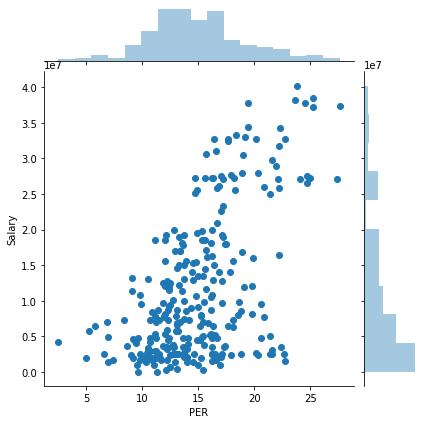

In [38]:
sns.jointplot(x="PER", y="Salary", data=dfmain)

In [39]:
kmeans.cluster_centers_

array([[16.20521739],
       [11.428125  ],
       [22.255     ]])